<a href="https://colab.research.google.com/github/cleysonl/Fast-Ai/blob/master/Lesson2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *

In [0]:
folder = 'cheetah'
file = 'urls_cheetah.csv'

In [0]:
folder = 'leopard'
file = 'urls_leopard.csv'

In [2]:
path = Path('data/animals')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

NameError: ignored

In [0]:
path.ls()

[PosixPath('data/animals/cheetah'),
 PosixPath('data/animals/leopard'),
 PosixPath('data/animals/models')]

In [0]:
classes = ['cheetah','leopard']

In [0]:
content = '/content'
download_images(content/path/folder/file, dest, max_pics=200)

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [0]:
# To remove the warning corresponding to the new changes in Pytorch
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.3,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['cheetah', 'leopard']

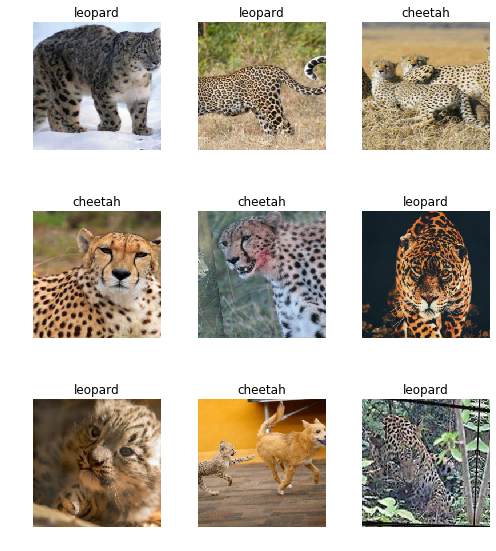

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cheetah', 'leopard'], 2, 264, 112)

# Train Model

In [0]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate)

In [0]:
# Changed 4 to 2 because it was overfitting
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.149333,0.348022,0.125000,00:06
1,0.786035,0.088518,0.035714,00:06
2,0.559682,0.135597,0.035714,00:06
3,0.464103,0.147221,0.026786,00:06
4,0.381080,0.153045,0.026786,00:06
5,0.326248,0.161860,0.026786,00:06


In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1');

In [0]:
interp=ClassificationInterpretation.from_learner(learn)

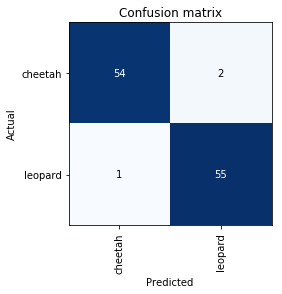

In [0]:
interp.plot_confusion_matrix()